<a href="https://colab.research.google.com/github/mansibhakare11/DL_ASS/blob/main/DL_LAB_ASS_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Bhakare Mansi

**Student ID:** 202302040005

**Date of Submission:** 13-4-25


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:**

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK resources

# Download necessary NLTK resources
nltk.download('punkt')  # Tokenization
nltk.download('stopwords')  # Stopwords for filtering
nltk.download('wordnet')  # Lemmatization
nltk.download('averaged_perceptron_tagger')  # POS tagging
nltk.download('maxent_ne_chunker')  # Named Entity Recognition (NER)
nltk.download('words')  # Dictionary for NER
nltk.download('punkt_tab') # Download the punkt_tab resource
nltk.download('averaged_perceptron_tagger_eng') #download the english version of the tagger
nltk.download('maxent_ne_chunker_tab') # Download the correct tab resource for ne_chunker

# Load dataset (assuming CSV format with 'label' and 'message' columns)
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_csv(url, sep="\t", header=None, names=['label', 'message'])
df.columns = ['label', 'message']  # Renaming columns for clarity

# Step 1: Preprocessing the text (Tokenization, Stopword Removal, Lemmatization)
def preprocess_text(text):
    """
    This function performs text preprocessing by:
    - Converting text to lowercase
    - Tokenizing the text
    - Removing stopwords
    - Lemmatizing the words
    """
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenization

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'message' column
df['cleaned'] = df['message'].apply(preprocess_text)
print(df.head())  # Check the first few rows to verify preprocessing



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /roo

  label                                            message  \
0   ham  Go until jurong point, crazy.. Available only ...   
1   ham                      Ok lar... Joking wif u oni...   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...   
3   ham  U dun say so early hor... U c already then say...   
4   ham  Nah I don't think he goes to usf, he lives aro...   

                                             cleaned  
0  go jurong point , crazy .. available bugis n g...  
1                    ok lar ... joking wif u oni ...  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3        u dun say early hor ... u c already say ...  
4          nah n't think go usf , life around though  


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

# Step 2: Text Vectorization
# Using both TF-IDF and CountVectorizer

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned'])

# CountVectorizer
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['cleaned'])

# Target variable (Label) - Spam = 1, Ham = 0
y = df['label'].apply(lambda x: 1 if x == 'spam' else 0)

# Train-test split (80% train, 20% test)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_count, X_test_count, _, _ = train_test_split(X_count, y, test_size=0.2, random_state=42)

print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")  # Check shape to verify
print(f"Count Vectorizer Matrix Shape: {X_count.shape}")  # Check shape to verify


TF-IDF Matrix Shape: (5572, 8152)
Count Vectorizer Matrix Shape: (5572, 8152)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# Step 3: Model Training (Logistic Regression & Naive Bayes)

# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_tfidf, y_train)

# Naive Bayes (MultinomialNB) Model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

print("Logistic Regression Model Trained")
print("Naive Bayes Model Trained")


Logistic Regression Model Trained
Naive Bayes Model Trained


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Model Evaluation

# Logistic Regression Evaluation
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

# Naive Bayes Evaluation
y_pred_nb = nb_model.predict(X_test_tfidf)
print("Naive Bayes - Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes - Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Naive Bayes - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Logistic Regression - Accuracy: 0.9596412556053812
Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Logistic Regression - Confusion Matrix:
 [[965   1]
 [ 44 105]]
Naive Bayes - Accuracy: 0.9739910313901345
Naive Bayes - Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.89       149

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Naive Bayes - Confusion Matrix:
 [[966   0]
 [ 29 120]]


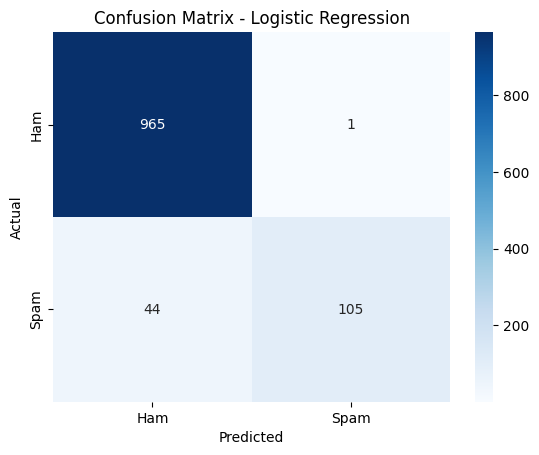

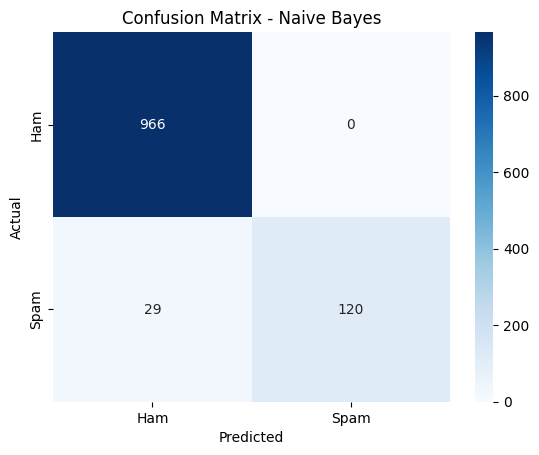

In [ ]:
# Step 5: Visualization - Confusion Matrix for both models

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Naive Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Step 6: Model Prediction on New SMS

# New SMS Examples
new_sms = [
    "Congrats! You've won a free lottery. Call now to claim your prize.",
    "Hey, are we meeting at 5 PM today?"
]

# Preprocess the new SMS messages
new_sms_cleaned = [preprocess_text(text) for text in new_sms]

# Vectorize the new messages using TF-IDF
new_sms_tfidf = tfidf_vectorizer.transform(new_sms_cleaned)

# Predict using Logistic Regression model
log_reg_predictions = log_reg_model.predict(new_sms_tfidf)
log_reg_pred_labels = ['Spam' if pred == 1 else 'Ham' for pred in log_reg_predictions]

# Predict using Naive Bayes model
nb_predictions = nb_model.predict(new_sms_tfidf)
nb_pred_labels = ['Spam' if pred == 1 else 'Ham' for pred in nb_predictions]

# Output the predictions in a beautiful format
print("\n---- Model Predictions on New SMS ----\n")

for i, sms in enumerate(new_sms):
    print(f"SMS {i+1}:")
    print(f"  Message: '{sms}'")
    print(f"  Logistic Regression Prediction: {log_reg_pred_labels[i]}")
    print(f"  Naive Bayes Prediction: {nb_pred_labels[i]}")
    print("-" * 50)



---- Model Predictions on New SMS ----

SMS 1:
  Message: 'Congrats! You've won a free lottery. Call now to claim your prize.'
  Logistic Regression Prediction: Spam
  Naive Bayes Prediction: Spam
--------------------------------------------------
SMS 2:
  Message: 'Hey, are we meeting at 5 PM today?'
  Logistic Regression Prediction: Ham
  Naive Bayes Prediction: Ham
--------------------------------------------------
